# Human Activity Recognition

In [4]:
!pip install -U matplotlib

  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4


In [5]:
# import the standard libraries
import pandas as pd #Data processing and I/O operation
import numpy as np #Linear Algebra
import matplotlib.pyplot as plt

%matplotlib inline

#Import the machine libraries
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Import the Dataset

In [6]:
train = shuffle(pd.read_csv('train.csv'))
test = shuffle(pd.read_csv('test.csv'))

In [7]:
train.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
4373,0.272729,-0.032112,-0.089805,-0.907377,-0.768412,-0.813236,-0.937856,-0.786847,-0.808578,-0.750826,...,-0.622256,-0.047121,-0.018493,0.700059,0.546869,-0.814344,0.210409,-0.046732,22,STANDING
5591,0.285475,0.029079,-0.103896,-0.547625,-0.179833,-0.324904,-0.604306,-0.245296,-0.349715,-0.201625,...,-0.205862,0.043412,-0.316404,-0.237362,0.261243,-0.830576,0.188184,-0.060290,26,WALKING
6432,0.116883,-0.114998,-0.281431,-0.303403,-0.240568,-0.240016,-0.376631,-0.309271,-0.312944,0.028444,...,-0.621229,0.066275,0.535774,0.978116,0.196083,-0.679959,0.271274,0.158424,28,WALKING_UPSTAIRS
2770,0.272977,-0.016492,-0.104403,-0.994853,-0.990514,-0.986933,-0.995408,-0.990258,-0.987086,-0.937840,...,-0.849906,0.123757,-0.284453,0.249700,-0.160733,0.395081,-0.728941,0.264128,15,LAYING
1123,0.381260,-0.024963,-0.127803,0.367696,0.208101,-0.473152,0.328270,0.147040,-0.484007,0.566071,...,-0.794223,-0.826107,0.472316,0.948742,0.335159,-0.793066,0.240775,0.028769,6,WALKING_DOWNSTAIRS
2035,0.291355,-0.007578,-0.088761,-0.307894,-0.143213,-0.197313,-0.359756,-0.151733,-0.139039,-0.017129,...,-0.925671,-0.153926,-0.444191,-0.978808,-0.018076,-0.629473,0.323132,-0.105029,11,WALKING_UPSTAIRS
602,0.275310,-0.018140,-0.104535,-0.994694,-0.993021,-0.990168,-0.995518,-0.992343,-0.991831,-0.940349,...,-0.829236,0.008442,0.082220,-0.413390,-0.600111,0.379777,-0.647320,-0.315766,3,LAYING
6954,0.313210,-0.049109,-0.110762,-0.023739,-0.193961,0.118607,-0.121185,-0.185572,0.178321,0.292089,...,-0.912295,-0.401999,-0.781603,-0.932418,-0.318142,-0.771288,0.254887,-0.003083,29,WALKING_UPSTAIRS
1723,0.376988,-0.025023,-0.155740,0.226370,0.349971,0.195479,0.133927,0.325047,0.165118,0.479828,...,-0.823693,-0.573743,0.206937,0.979765,-0.064203,-0.780289,0.249106,0.000996,8,WALKING_DOWNSTAIRS
3355,0.267771,-0.031304,-0.094330,-0.384203,0.069388,-0.188255,-0.384984,0.028312,-0.186020,-0.323373,...,0.051478,0.202040,-0.380956,0.344675,-0.361624,-0.748782,0.132080,0.196211,17,WALKING


In [8]:
train.tail(1)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
2057,0.26433,-0.022072,-0.133379,-0.214011,-0.162882,-0.178638,-0.250467,-0.164771,-0.130833,-0.111599,...,-0.559576,0.231335,-0.100702,0.944175,-0.938698,-0.613441,0.332565,-0.110461,11,WALKING_UPSTAIRS


In [9]:
train.shape

(7352, 563)

In [ ]:
test.shape

### Check for missing values

In [10]:
print('Any missing value in training set:', train.isnull().values.any())
print('Any missing value in training set:', test.isnull().values.any())

Any missing value in training set: False
Any missing value in training set: False


### Exploring the Dataset

In [12]:
train_outcome = pd.crosstab(index = train['Activity'], columns='Count')
train_outcome

col_0,Count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


### Exploratory Data Analysis

In [13]:
temp = train['Activity'].value_counts()
temp

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [14]:
df = pd.DataFrame({'labels':temp.index, 'values':temp.values})

In [15]:
df.head(2)

,labels,values
0,LAYING,1407
1,STANDING,1374


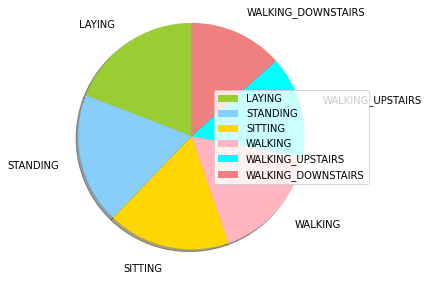

In [16]:
labels=df['labels']
sizes = df['values']
colors = ['yellowgreen', 'lightskyblue', 'gold', 'lightpink', 'cyan', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, labels = labels, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc='right')
plt.axis('equal')
plt.tight_layout()
plt.show()

### Data Processing

In [17]:
X_train = pd.DataFrame(train.drop(['Activity', 'subject'], axis=1))
Y_train_label = train.Activity.values.astype(object)
X_test = pd.DataFrame(test.drop(['Activity', 'subject'], axis=1))
Y_test_label = test.Activity.values.astype(object)

In [18]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

encoder.fit(Y_train_label)
y_train = encoder.transform(Y_train_label)

In [19]:
y_train

array([2, 3, 5, ..., 0, 3, 5])

In [20]:
encoder.fit(Y_test_label)
y_test = encoder.transform(Y_test_label)

In [22]:
y_test

array([0, 2, 0, ..., 1, 1, 3])

In [23]:
num_cols = X_train._get_numeric_data().columns
num_cols.size

561

## Model Building for Human Acitivity Recognition

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [32]:
predicted =[]
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    predicted.append((accuracy_score(y_test, y_pred)*100))

In [33]:
predicted.index(max(predicted))

19

In [34]:
predicted[19]

90.29521547336275

In [35]:
len(predicted)

49

Inference: The n_neighbours=19 giving the best accuracy for the model

In [28]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [29]:
y_pred = knn.predict(x_test)

In [30]:
print((accuracy_score(y_test, y_pred)*100), '%')

89.75229046487954 %


In [ ]:
scores = []
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

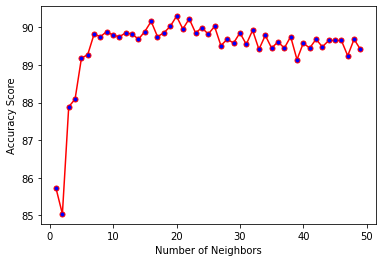

In [36]:
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
xticks = range(1,50)
plt.plot(xticks, predicted, color='red', linestyle='solid', marker='o', 
        markersize=5, markerfacecolor='blue')
plt.show()

In [39]:
scores = np.array(predicted)
print('Optimal number of neighbors is:', scores.argmax())
print('Accuracy Score:' +str(scores.max()),'%')

Optimal number of neighbors is: 19
Accuracy Score:90.29521547336275 %


### Conclusion

In [40]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred_label = list(encoder.inverse_transform(y_pred))

In [41]:
y_pred_label

['LAYING',
 'STANDING',
 'LAYING',
 'WALKING_DOWNSTAIRS',
 'STANDING',
 'SITTING',
 'STANDING',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'WALKING_DOWNSTAIRS',
 'STANDING',
 'STANDING',
 'WALKING',
 'WALKING',
 'STANDING',
 'LAYING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'WALKING',
 'WALKING_UPSTAIRS',
 'STANDING',
 'WALKING',
 'STANDING',
 'WALKING_DOWNSTAIRS',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS',
 'WALKING',
 'WALKING_UPSTAIRS',
 'STANDING',
 'SITTING',
 'WALKING_DOWNSTAIRS',
 'WALKING_DOWNSTAIRS',
 'STANDING',
 'WALKING_UPSTAIRS',
 'STANDING',
 'WALKING',
 'STANDING',
 'STANDING',
 'WALKING_DOWNSTAIRS',
 'WALKING_DOWNSTAIRS',
 'WALKING_DOWNSTAIRS',
 'LAYING',
 'WALKING',
 'WALKING',
 'SITTING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS',
 'SITTING',
 'WALKING',
 'STANDING',
 'WALKING_UPSTAIRS',
 'STANDING',
 'LAYING',
 'SITTING',
 'WALKING',
 'LAYING',
 'SITTING',
 'WALKING',
 'WALKING',
 'WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'WALKING',
 'WALKI

In [42]:
print(confusion_matrix(Y_test_label, y_pred_label))

[[513  13  11   0   0   0]
 [  3 390  97   0   0   1]
 [  0  22 510   0   0   0]
 [  0   0   0 482  12   2]
 [  0   0   0  45 327  48]
 [  0   0   0  39   1 431]]


In [43]:
print(classification_report(Y_test_label, y_pred_label))

                    precision    recall  f1-score   support

            LAYING       0.99      0.96      0.97       537
           SITTING       0.92      0.79      0.85       491
          STANDING       0.83      0.96      0.89       532
           WALKING       0.85      0.97      0.91       496
WALKING_DOWNSTAIRS       0.96      0.78      0.86       420
  WALKING_UPSTAIRS       0.89      0.92      0.90       471

          accuracy                           0.90      2947
         macro avg       0.91      0.90      0.90      2947
      weighted avg       0.91      0.90      0.90      2947

